##### Name : Amruta Mulay ,  Github Username : Amruta131198 , USC ID : 6897885438

In [1]:
#Importing all necessary libraries required for HW-1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification

#### References --->
https://www.ibm.com/topics/knn
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

# (a.) Accessing the Veterbral Column Data into Dataframe

In [2]:
vertebral_col_df = pd.read_table('../data/vertebral_column_data/column_2C.dat', header=None, sep = '\s+', 
                                     names = ["pelincidence", "peltilt","lorangle", "slope", "pelradius", 
                                              "grade", "labels"])
vertebral_col_df

,pelincidence,peltilt,lorangle,slope,pelradius,grade,labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


# (b) Pre-Processing and Exploratory Data Analysis

# (i) Scatter Plot

Text(0.5, 1.05, 'Scatter Plot of all independent variables for Veterbral Column Data')

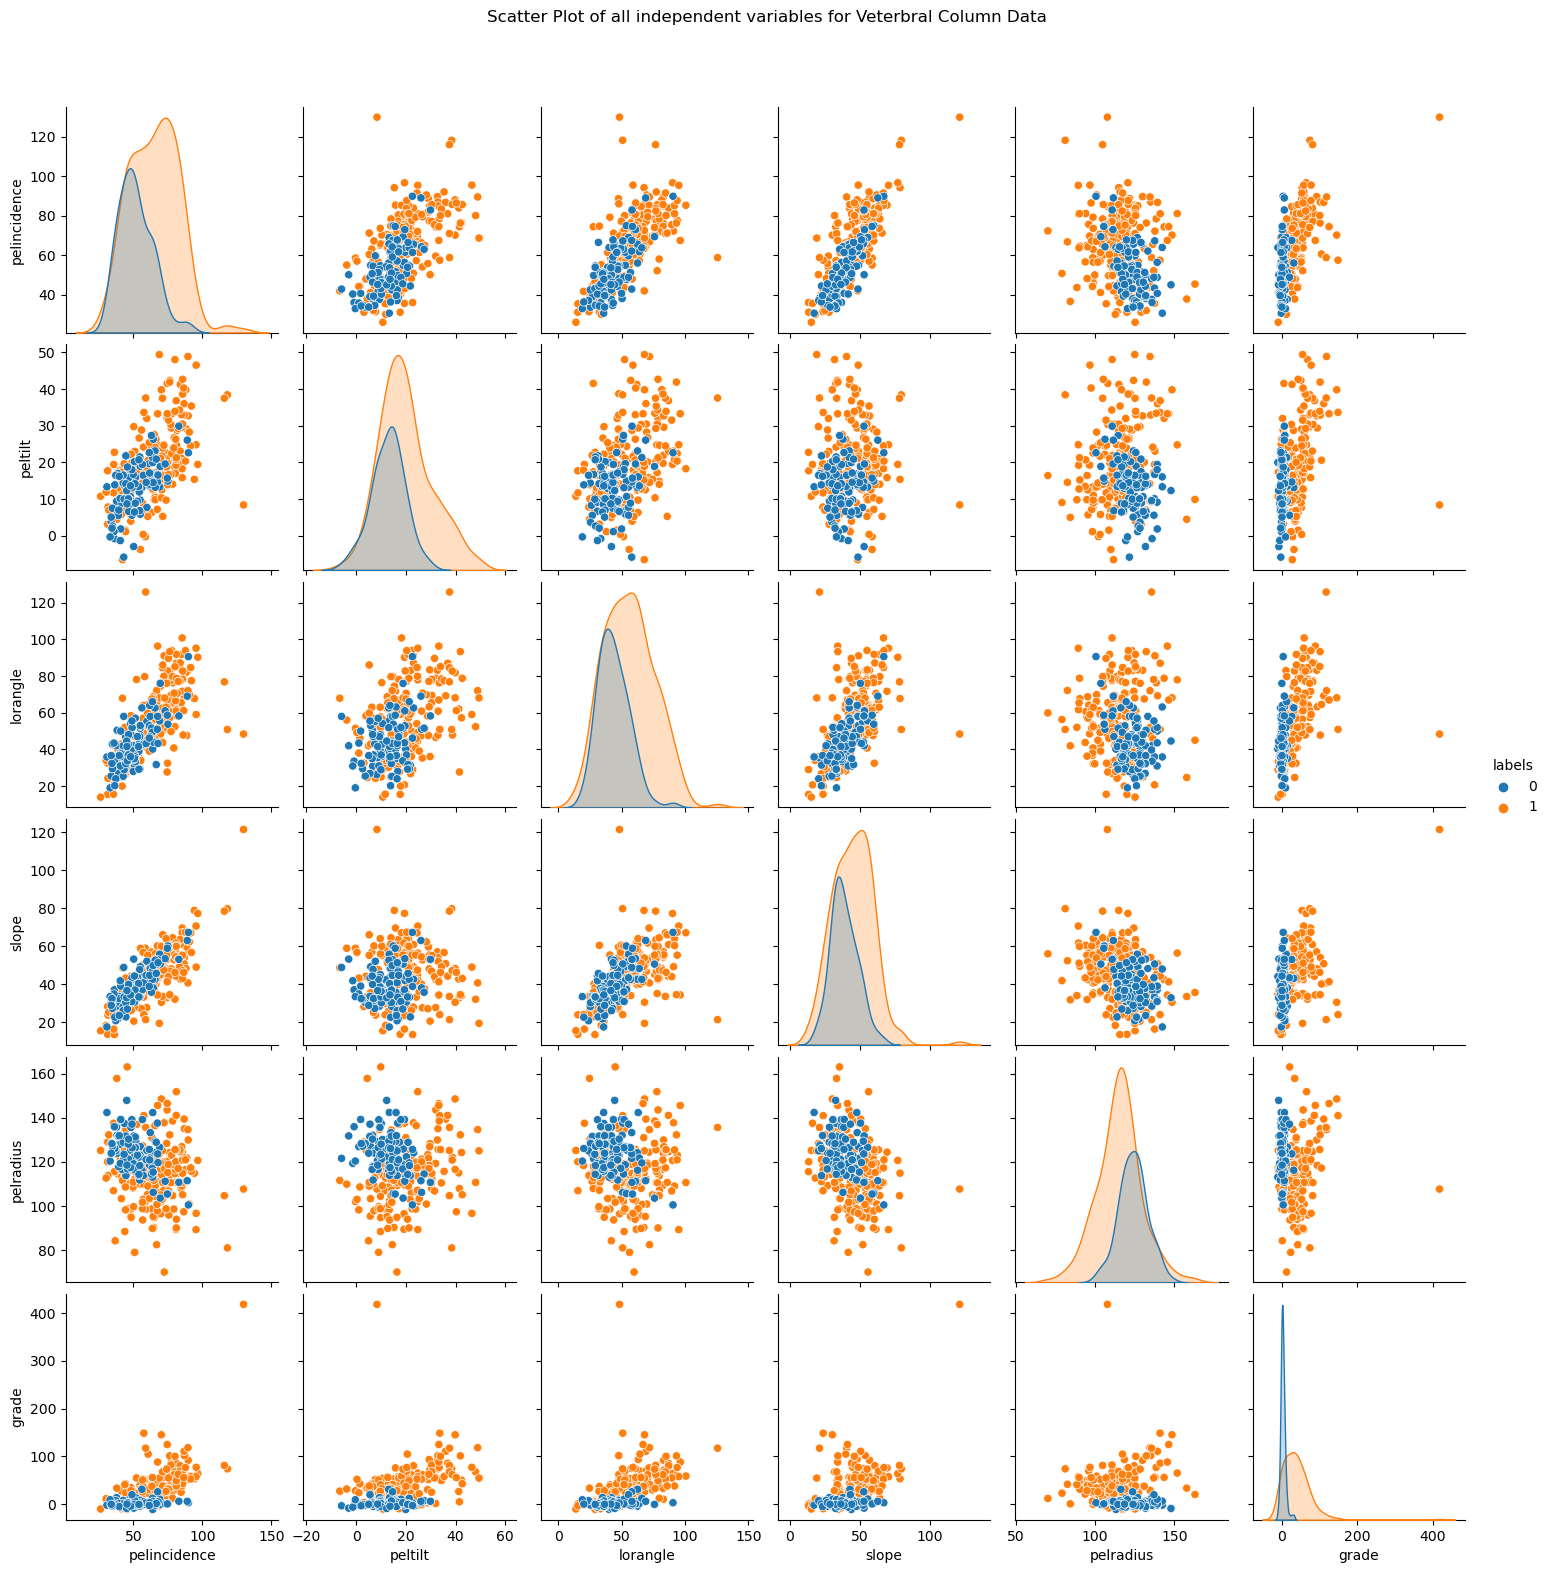

In [3]:
# Converting categorical classes to numeric values : AB = 1 and NO = 0
vertebral_col_df.labels.replace(['AB', 'NO'], [1, 0], inplace=True)
vertebral_col_df

plot = sns.pairplot(data = vertebral_col_df, hue = "labels")
plot.fig.suptitle("Scatter Plot of all independent variables for Veterbral Column Data", y=1.05)

# (ii) Box Plot

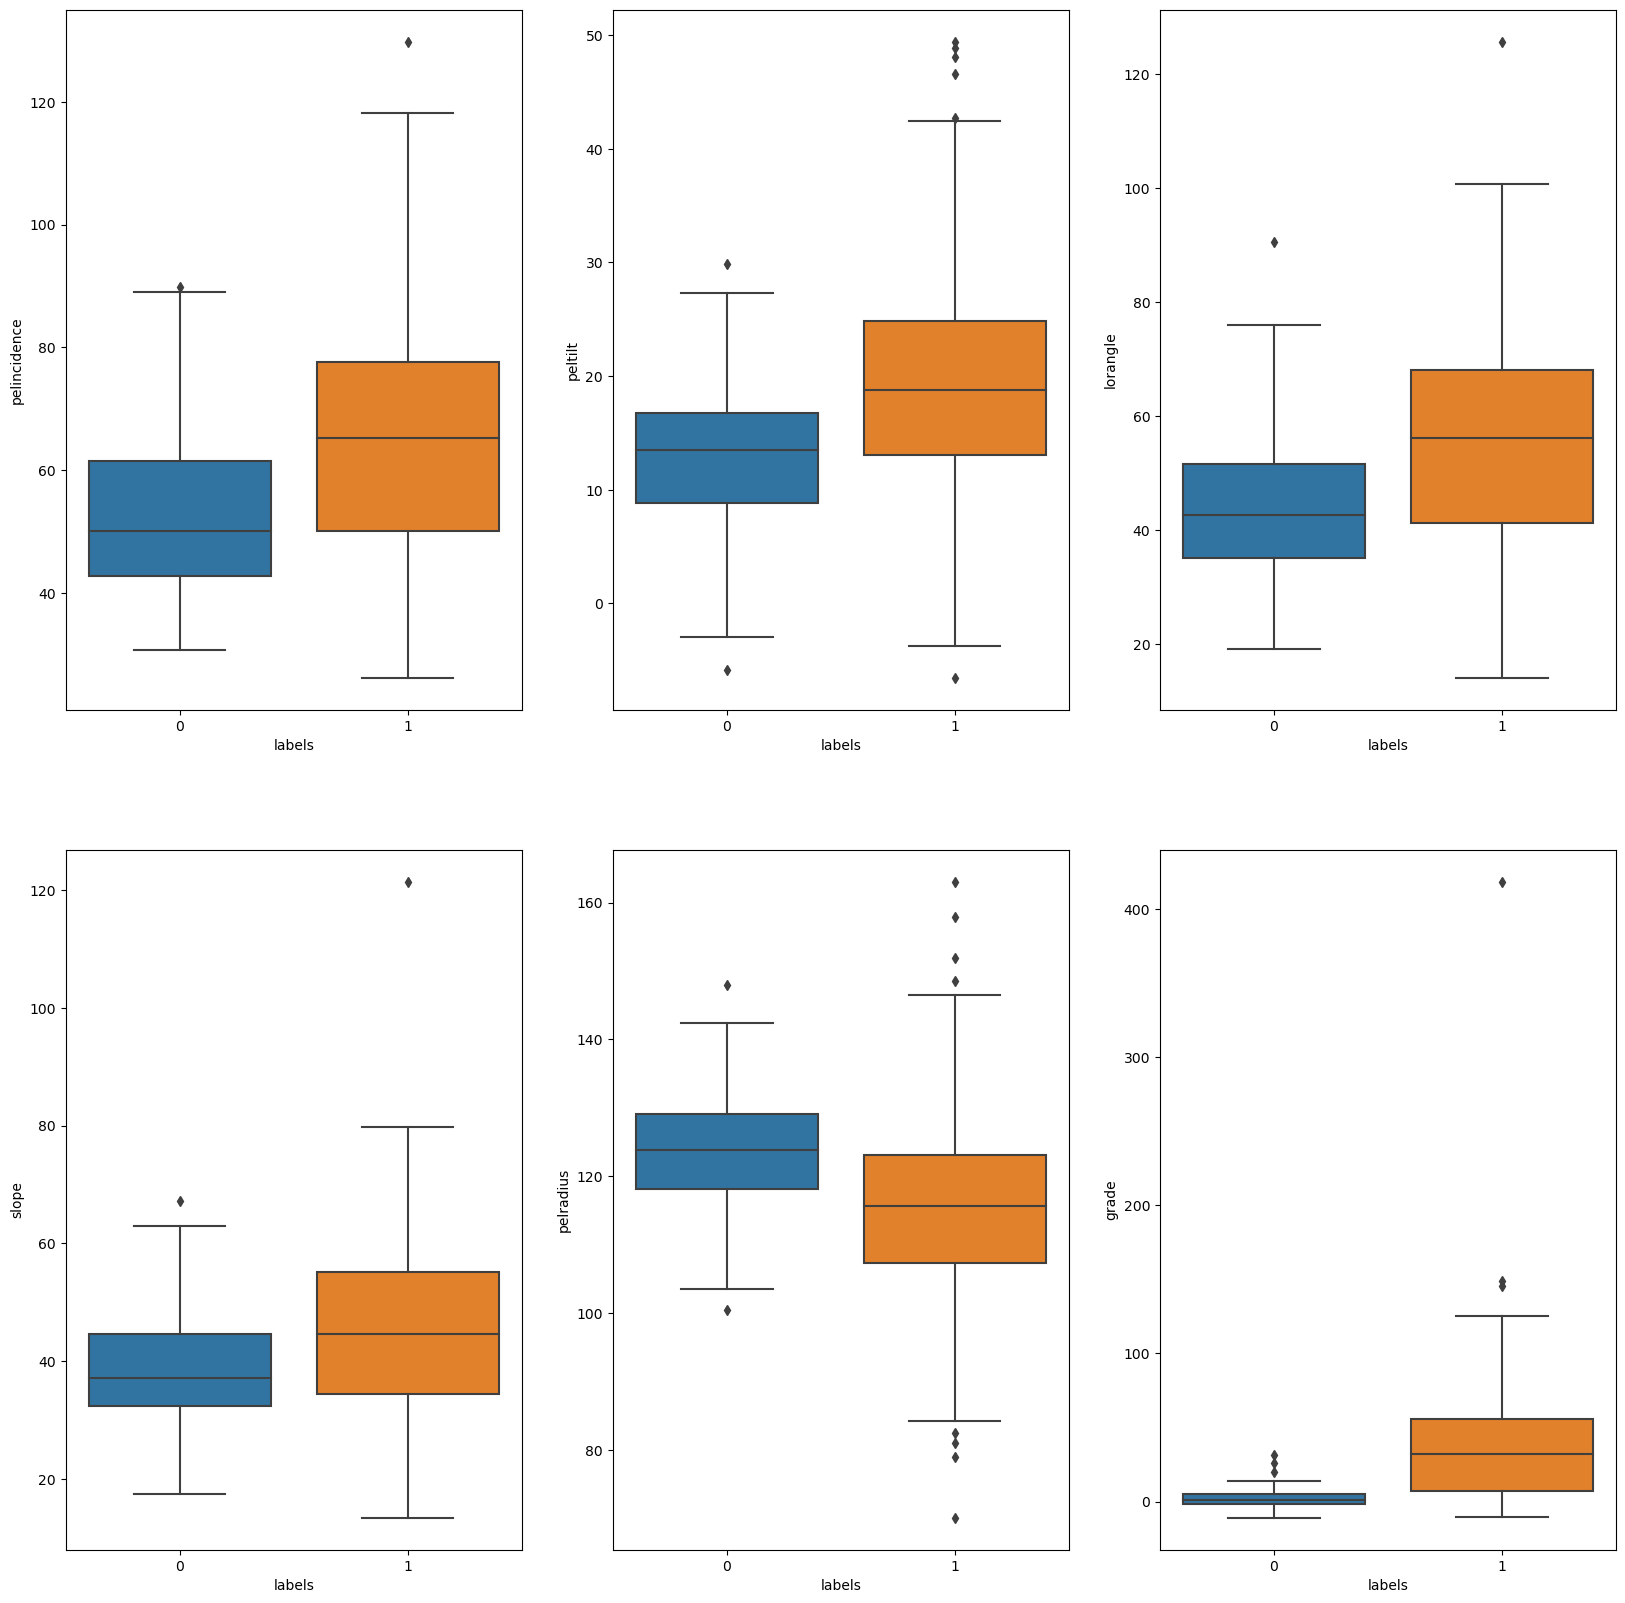

In [4]:
# for i in range(0, len(vertebral_col_df.columns) - 1):
#     sns.boxplot(data=vertebral_col_df, x="labels", y=vertebral_col_df.columns[i], width=0.5)
#     plt.show()

fig, axes = plt.subplots(2, 3, figsize=(20, 20))

for i in range(6):
    sns.boxplot(data=vertebral_col_df, x="labels", y=vertebral_col_df.columns[i], ax=axes[i // 3, i % 3])

plt.show()

# (iii.) Dividing Dataset into Training and Test Sets

In [5]:
training_set = pd.concat([vertebral_col_df[vertebral_col_df["labels"] == 0].iloc[0:70, :], 
                          vertebral_col_df[vertebral_col_df["labels"] == 1].iloc[0:140, :]])
testing_set = pd.concat([vertebral_col_df[vertebral_col_df["labels"] == 0].iloc[70:, :], 
                         vertebral_col_df[vertebral_col_df["labels"] == 1].iloc[140:, :]])

print(f"Training Data: {training_set.shape}") #Shape : No.of rows in the dataset, No.of Attributes
print(f"Testing Data: {testing_set.shape}") 

Training Data: (210, 7)
Testing Data: (100, 7)


# (c) Classification using KNN on Vertebral Column Data Set

# (i.) KNN with Euclidean Metric

In [6]:
#Divide Training set into Independent Features and Dependent Feature
training_independent = training_set.iloc[:,:-1]
training_dependent = training_set.iloc[:,-1]

#Divide Test set into Independent Features and Dependent Feature
test_independent = testing_set.iloc[:,:-1]
test_dependent_true_value = testing_set.iloc[:,-1]

#Using the sklearn library to use KNN Classifier for training the model
knnClassifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
knnClassifier.fit(training_independent, training_dependent)

KNeighborsClassifier(metric='euclidean')

# (ii.) Test data and calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score for the most suitable value of k.

In [7]:
training_errors = []
testing_errors = []

optimal_k = 0
minimum_error = float("inf")

for k in range(208, 0, -1):
    knnClassifier = KNeighborsClassifier(n_neighbors = k, p=2, metric='euclidean')
    knnClassifier.fit(training_independent, training_dependent)
    
    train_error = 1 - accuracy_score(training_dependent, knnClassifier.predict(training_independent))
    training_errors.append(train_error)
#     print(f"k = {k}, Corresponding Training error : {train_error}")
    
    test_error = 1 - accuracy_score(test_dependent_true_value, knnClassifier.predict(test_independent))
    if test_error < minimum_error:
        minimum_error = test_error
        optimal_k = k
    testing_errors.append(test_error)
    
print(f"OPTIMAL k = {optimal_k}, testing error is minimum = {round(minimum_error, 2)}")

print(f"Minimum Training Error = {min(training_errors)}")


OPTIMAL k = 4, testing error is minimum = 0.06
Minimum Training Error = 0.0


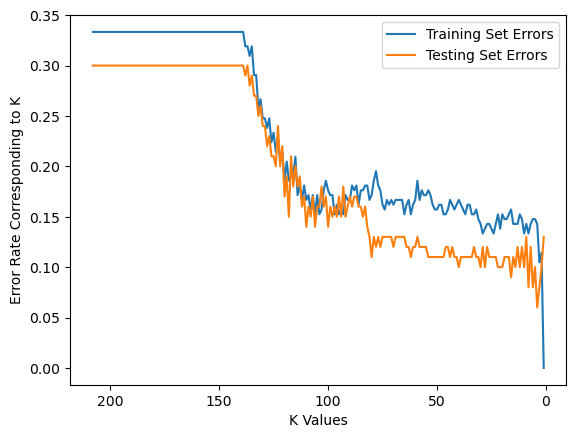

In [8]:
#Plotting graphs for training and testing errors for different values of k
i = range(208,0,-1)

plt.plot(i, training_errors, label="Training Set Errors")
plt.plot(i, testing_errors, label="Testing Set Errors")
plt.gca().set_xlabel("K Values")
plt.gca().set_ylabel("Error Rate Corresponding to K")
plt.gca().legend()
plt.gca().invert_xaxis()
plt.show()

#### As we can see here the optimal k value is 4 since we observe the minimum test error of 0.06  corresponding to this k value in the graph. 

In [9]:
#Calculating confusion matrix, True Positive Rate, True Negative Rate, Precision, Recall and F1-score
optimal_K_classifier = KNeighborsClassifier(n_neighbors=optimal_k, p = 2, metric='euclidean')
optimal_K_classifier.fit(training_independent, training_dependent)

predicted_testing_output = optimal_K_classifier.predict(test_independent)

confusionMatrix = confusion_matrix(test_dependent_true_value, predicted_testing_output)
true_neg = confusionMatrix[0][0]
false_neg = confusionMatrix[1][0]
true_pos = confusionMatrix[1][1]
false_pos = confusionMatrix[0][1]

true_pos_rate = true_pos / (true_pos + false_neg)
true_neg_rate = true_neg / (true_neg + false_pos)

precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f_1_score = 2 * (precision * recall) / (precision + recall)

print("\n Testing Set Metrics ::: When k = ", optimal_k, ":",
          "\n\n Sensitivity(TPR) =", true_pos_rate,
          "\n Specificity(TNR) =", true_neg_rate,
          "\n Precision =", precision,
          "\n Recall =", recall,
          "\n F1 Score =", f_1_score,
          "\n\n Confusion Matrix for Test Set \n", confusionMatrix) 


 Testing Set Metrics ::: When k =  4 : 

 Sensitivity(TPR) = 0.9857142857142858 
 Specificity(TNR) = 0.8333333333333334 
 Precision = 0.9324324324324325 
 Recall = 0.9857142857142858 
 F1 Score = 0.9583333333333333 

 Confusion Matrix for Test Set 
 [[25  5]
 [ 1 69]]


In [10]:
confusionMatrix_train = confusion_matrix(training_dependent, knnClassifier.predict(training_independent))

true_neg_train = confusionMatrix_train[0][0]
false_neg_train = confusionMatrix_train[1][0]
true_pos_train = confusionMatrix_train[1][1]
false_pos_train = confusionMatrix_train[0][1]

true_pos_rate_train = true_pos_train / (true_pos_train + false_neg_train)
true_neg_rate_train = true_neg_train / (true_neg_train + false_pos_train)

precision_train = true_pos_train / (true_pos_train + false_pos_train)
recall_train = true_pos_train / (true_pos_train + false_neg_train)
f_1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

print("\nTraining Set Metrics ::: When k = ", optimal_k, ":",
          "\n\n Sensitivity(TPR) =", true_pos_rate_train,
          "\n Specificity(TNR) =", true_neg_rate_train,
          "\n Precision =", precision_train,
          "\n Recall =", recall_train,
          "\n F1 Score =", f_1_score_train,
          "\n\n Confusion Matrix for Training Set \n", confusionMatrix_train) 


Training Set Metrics ::: When k =  4 : 

 Sensitivity(TPR) = 1.0 
 Specificity(TNR) = 1.0 
 Precision = 1.0 
 Recall = 1.0 
 F1 Score = 1.0 

 Confusion Matrix for Training Set 
 [[ 70   0]
 [  0 140]]


# (iii.) Plot best test error rate obtained by some value of k, against size of training set

For N : 10, Optimal K : 1, Minimum Error : 0.25
For N : 20, Optimal K : 6, Minimum Error : 0.2
For N : 30, Optimal K : 1, Minimum Error : 0.22
For N : 40, Optimal K : 11, Minimum Error : 0.25
For N : 50, Optimal K : 26, Minimum Error : 0.3
For N : 60, Optimal K : 21, Minimum Error : 0.29
For N : 70, Optimal K : 26, Minimum Error : 0.29
For N : 80, Optimal K : 31, Minimum Error : 0.29
For N : 90, Optimal K : 41, Minimum Error : 0.29
For N : 100, Optimal K : 6, Minimum Error : 0.25
For N : 110, Optimal K : 6, Minimum Error : 0.22
For N : 120, Optimal K : 16, Minimum Error : 0.17
For N : 130, Optimal K : 16, Minimum Error : 0.16
For N : 140, Optimal K : 16, Minimum Error : 0.15
For N : 150, Optimal K : 16, Minimum Error : 0.13
For N : 160, Optimal K : 6, Minimum Error : 0.13
For N : 170, Optimal K : 6, Minimum Error : 0.13
For N : 180, Optimal K : 16, Minimum Error : 0.1
For N : 190, Optimal K : 6, Minimum Error : 0.09
For N : 200, Optimal K : 6, Minimum Error : 0.09
For N : 210, Optimal 

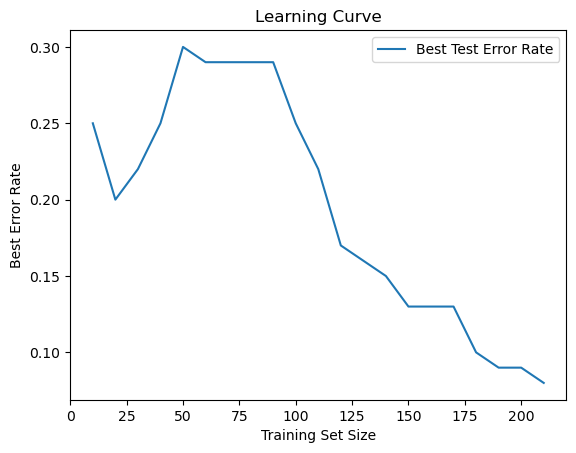

In [11]:
error_list = []
best_test_error_rate_list = []
optimal_k_list = []

for N in range(10, 211, 10):
    training_subset = pd.concat([training_set[training_set["labels"] == 0].iloc[0: (N//3), :], 
                                 training_set[training_set["labels"] == 1].iloc[0: (N-(N//3)), :]])
    
    #Dividing into independent features and dependent features
    training_subset_independent = training_subset.iloc[:,:-1]
    training_subset_dependent = training_subset.iloc[:,-1]
    
    optimal_k = 0
    minimum_error = float("inf")
    
    for k in range(1, N, 5):
        classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")
        classifier.fit(training_subset_independent, training_subset_dependent)
        
        predicted_test_results = classifier.predict(test_independent)
        test_error = 1 - accuracy_score(test_dependent_true_value, predicted_test_results)
        
        if test_error < minimum_error:
            minimum_error = round(test_error, 2)
            optimal_k = k
    
    optimal_k_list.append(optimal_k)
    best_test_error_rate_list.append(minimum_error)
    error_list.append((N, optimal_k, minimum_error))
    print(f"For N : {N}, Optimal K : {optimal_k}, Minimum Error : {minimum_error}")
    
best_test_error_rate = sorted(error_list, key = lambda x: x[2])
print(f"\n Best Test Error Rate is found to be : {best_test_error_rate[0][2]} " +
      f"for the Optimal K value as: {best_test_error_rate[0][1]}" +
      f" when N holds the value : {best_test_error_rate[0][0]}")

plt.plot(range(10, 211, 10), best_test_error_rate_list, label="Best Test Error Rate")
plt.gca().set_title("Learning Curve")
plt.gca().set_xlabel("Training Set Size")
plt.gca().set_ylabel("Best Error Rate")
plt.gca().legend()
plt.show()

#### We can conclude from the Learning Curve that as the size of the Training Set gets larger, the KNN classifier's Error Rate reduces.

# (d) Replace the Euclidean metric with the following metrics and test them. 

In [12]:
def replace_knn_metrics(distance_metric, weights = 'uniform', p_metric = 1):
    k_vs_test_errors = dict()
    
    extra_metric = None
    if distance_metric == "mahalanobis":
        extra_metric = {"VI": np.linalg.pinv(np.cov(training_independent, rowvar=False))}
    else:
        extra_metric = None
    
    for k in range(1, 200, 5):
        classifier = KNeighborsClassifier(n_neighbors=k, p=p_metric, metric=distance_metric, 
                                          weights=weights, metric_params=extra_metric)
        classifier.fit(training_independent, training_dependent)
        test_error = 1 - accuracy_score(test_dependent_true_value, classifier.predict(test_independent))
        k_vs_test_errors[k] = round(test_error, 2) # Dictionary stores (k, test_error) pair
    
    return k_vs_test_errors

def min_test_error_and_its_k_value(k_vs_test_errors):
    sorted_dict = sort_dict_based_on_test_errors(k_vs_test_errors)
    anchor = sorted_dict[list(sorted_dict)[0]]
    ans = {}
    
    for key, value in sorted_dict.items():
        if sorted_dict[key] != anchor:
            break
        ans[key] = value
        
    return ans

def sort_dict_based_on_test_errors(k_vs_test_errors_dict):
    sorted_dict = {}
    
    sorted_tuples = sorted(k_vs_test_errors_dict.items(), key = lambda item: item[1])
    sorted_dict = {k: v for k, v in sorted_tuples}
    
    return sorted_dict

### (i-A.) Minkowski Distance: which becomes Manhattan Distance with p = 1

In [13]:
# manhattan distance analysis
k_vs_test_errors_dict = replace_knn_metrics("manhattan", 'uniform')
ans = min_test_error_and_its_k_value(k_vs_test_errors_dict)
print("================================================================")
print("\tOptimal K Values \t\t  Minimum Test Errors")
print("================================================================")
for key, value in ans.items():
    print(f"\t\t{key} \t\t\t\t {value}")
    print("----------------------------------------------------------------")

	Optimal K Values 		  Minimum Test Errors
		6 				 0.11
----------------------------------------------------------------
		11 				 0.11
----------------------------------------------------------------
		26 				 0.11
----------------------------------------------------------------


##### Three different values of k gives us same the minimum test scores, hence we select the minimum k which is 6. Therefore, optimal k value is 6

### (i-B.) Minkowski Distance: With $log_{10}(p) ∈ {0.1, 0.2, 0.3, . . . , 1}$. In this case, use the $k^∗$ you found for the Manhattan distance in $1(d)iA$. What is the best $log_{10}(p)$?

In [14]:
def minkowski_distance(p_logspace):
    test_errors = []
    
    for p in p_logspace:
        classifier = KNeighborsClassifier(n_neighbors=6, p=p, metric="minkowski")
        classifier.fit(training_independent, training_dependent)
        test_error = 1 - accuracy_score(test_dependent_true_value, classifier.predict(test_independent))
        test_errors.append(test_error)
        
    return {
        "P": p_logspace,
        "log10(p)": np.linspace(0.1, 1, 10),
        "test_error": test_errors
    }

##### Best $log_{10}(p)$ analysis

In [15]:
# Minkowski Distance Analysis
answer = minkowski_distance(np.logspace(0.1, 1, 10))
minkowski_df = pd.DataFrame(answer)
minkowski_df

# Best 𝑙𝑜𝑔10(𝑝) analysis
minkowski_df[minkowski_df["test_error"] == minkowski_df["test_error"].min()]

,P,log10(p),test_error
5,3.981072,0.6,0.06


### (i-C.) Minkowski Distance: which becomes Chebyshev Distance with p → ∞

In [16]:
# Chebyshev Distance
chebyshev_answer = replace_knn_metrics("chebyshev", 'uniform')
chebyshev_ans = min_test_error_and_its_k_value(chebyshev_answer)

print("================================================================")
print("\tOptimal K Values \t\t  Minimum Test Errors")
print("================================================================")
for key, value in chebyshev_ans.items():
    print(f"\t\t{key} \t\t\t\t {value}")
    print("----------------------------------------------------------------")

	Optimal K Values 		  Minimum Test Errors
		16 				 0.08
----------------------------------------------------------------


##### Therefore, k_optimal equals 16

# (d-ii.) Replace Euclidean metric with Mahalanobis Distance metric and test 

In [17]:
# Mahalanobis Distance
mahalanobis_answer = replace_knn_metrics("mahalanobis", 'uniform', 2)
mahalanobis_ans = min_test_error_and_its_k_value(mahalanobis_answer)

print("================================================================")
print("\tOptimal K Values \t\t  Minimum Test Errors")
print("================================================================")
for key, value in mahalanobis_ans.items():
    print(f"\t\t{key} \t\t\t\t {value}")
    print("----------------------------------------------------------------")

	Optimal K Values 		  Minimum Test Errors
		1 				 0.17
----------------------------------------------------------------
		6 				 0.17
----------------------------------------------------------------


##### We have two values of k that give the same minimum test errors. Since  𝑘=1 will imply the point to be the neighbour of itself, 𝑘 = 6 is considered to be the optimal value.Therefore, k_optimal = 6

# (e.) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when  𝑘∈{1,6,11,16,...,196}.

In [18]:
def print_table(distance_metric, answer):
    print("\n*****************************************************")
    print(f"Report Best Test Error for {distance_metric}")
    print("*****************************************************\n")
    print("================================================================")
    print("\tOptimal K Values \t\t  Minimum Test Errors")
    print("================================================================")
    for key, value in answer.items():
        print(f"\t\t{key} \t\t\t\t {value}")
        print("----------------------------------------------------------------")
        
def KNN_Analysis_Weighted():
    distance_metrics = ["euclidean", "manhattan", "chebyshev"]
    weighted_ans = dict()
    for distance in distance_metrics:
        if distance == "euclidean":
            weighted_ans = replace_knn_metrics(distance, 'distance', 2)
        else:
            weighted_ans = replace_knn_metrics(distance, 'distance')
        final = min_test_error_and_its_k_value(weighted_ans)
        print_table(distance, final)
        print('\n\n')

In [19]:
KNN_Analysis_Weighted()


*****************************************************
Report Best Test Error for euclidean
*****************************************************

	Optimal K Values 		  Minimum Test Errors
		6 				 0.1
----------------------------------------------------------------




*****************************************************
Report Best Test Error for manhattan
*****************************************************

	Optimal K Values 		  Minimum Test Errors
		26 				 0.1
----------------------------------------------------------------




*****************************************************
Report Best Test Error for chebyshev
*****************************************************

	Optimal K Values 		  Minimum Test Errors
		16 				 0.11
----------------------------------------------------------------
		31 				 0.11
----------------------------------------------------------------
		36 				 0.11
----------------------------------------------------------------
		41 				 0.11
---------------

##### The Optimal values of K using Weighted Voting for Euclidean is : 6, Manhattan is : 26, Chebyshev is : 16 

## (f) What is the lowest training error rate you achieved in this homework?

##### The lowest training error rate that I achieved in this homework is 0.0 achieved at k = 1. This is because when we are classifying a sample from training set, it considers itself as the neighbor due to which the error notified is zero!